<center><h1> <font color="green"><u>Wordclouds</u></font> </h1></center>

<h3> <font color="purple"><u>This section includes:</u></font> </h3>

> * Text Mining <br />
> * Cleaning of string data<br />
> * Visualization (as Wordcloud) <br />

<br /><hr /><br />

In [1]:
# setting the working directory
setwd("~/Documents/A-tracking-of-2019-nCoV/COVID-19/ready_to_use")

<br />

In [2]:
# Loading desired libraries
library(readr)
library(stringr)

In [3]:
bulk = read_csv('COVID-19/Mixed/countryWise_bulk_summary.csv')
hubei = read_csv('COVID-19/Hubei/Hubei_dataset_dateWise_summary.csv')

Parsed with column specification:
cols(
  Country = col_character(),
  Day = col_double(),
  Date = col_character(),
  Confirmed = col_double(),
  Deaths = col_double(),
  Active.Cases = col_double(),
  Closed.Cases = col_double()
)

Parsed with column specification:
cols(
  State = col_character(),
  Day = col_double(),
  Date = col_character(),
  Confirmed = col_double(),
  Deaths = col_double(),
  Active.Cases = col_double(),
  Closed.Cases = col_double()
)



In [4]:
# joining data of hubei to china
china = bulk[which(str_detect(bulk$Country, "China")),]
newData = china[which(china$Day == hubei$Day),4:ncol(china)] + hubei[which(china$Day == hubei$Day),4:ncol(hubei)]

bulk[which(str_detect(bulk$Country, "China")),4:ncol(bulk)] = newData

<br /> 
### Creating the collection of Country-Names

In [5]:
# Loading desired libraries
library(stringr)

In [6]:

# wordlist generator
wordlist = function(dfName, col) {
    get(dfName) -> Bulk
    
    # setting limits
    if(col == 'Confirmed') {
        ones = 100
        threes = 1000
    } else if(col == 'Deaths') {
        ones = 50
        threes = 500
    } else if(col == 'Recovered') {
        ones = 250
        threes = 1000
    }
    
    
    # setting the frequency of the countries
    once = Bulk[which(Bulk[col] <= ones),]$Country
    thrice = Bulk[which((Bulk[col] > ones) && (Bulk[col] <= threes)),]$Country
    fives = Bulk[which(Bulk[col] > threes),]$Country

    Bulk = c(once, thrice, thrice, thrice, fives, fives, fives, fives, fives)
    Bulk = sort(Bulk)
    
    return(Bulk)
}


<br />

In [7]:
# total no. of affected countries
total_countries = nlevels(as.factor(bulk$Country))

In [8]:
confirmed.Bulk = bulk[which(bulk$Confirmed != 0),]
deaths.Bulk = bulk[which(bulk$Deaths != 0),]
#recovered.Bulk = bulk[which(bulk$Recovered != 0),]


confirmed_country_words = wordlist('confirmed.Bulk', 'Confirmed')   # for confirm-case vector
deaths_country_words = wordlist('deaths.Bulk', 'Deaths')            # for critical-case vector
#recovered_country_words = wordlist('recovered.Bulk', 'Recovered')   # for recovery-case vector

<br />

### Cleaning the list(s)

In [9]:
# Loading desired libraries
library(base)

In [10]:

# function to create the file
fileWriter <- function(wordList, fileName) {
    path = paste("~/Documents/A-tracking-of-2019-nCoV/COVID-19/Notebooks/word-lists/", fileName, ".txt", sep = "")

    newFile <- file(path)                   # opening connection
    writeLines(wordList, newFile)           # writing line-by-lines
    close(newFile)                          # closing connection
    
    #print("Created successifully!!")
}


<br />

In [11]:
# writing the words into the text file

fileWriter(confirmed_country_words, 'confirmedList')     # countries having the confirm cases
fileWriter(deaths_country_words, 'deathsList')           # countries having deaths too
#fileWriter(recovered_country_words, 'recoveryList')      # countries having the recovered cases

<br />

### Customizing the Word-Clouds

In [12]:
# Loading desired libraries
library("tm") # text-mining library

Loading required package: NLP



<br /> 
#### Functions

In [13]:

# text cleaning
cleaner <- function(words) {
    # cleaning the words
    words = gsub(" and ", " & ", words)
    words = gsub(" ", "-", words)
    words = gsub(",", "", words)
    
    wordList <- Corpus(VectorSource(words))
    wordList <- tm_map(wordList, content_transformer(tolower))  # Converts words to lower case
    
    return(wordList)
}


In [14]:

# Term Document Matrix creater
getTDM <- function(wordList) {
    words_dtm <- TermDocumentMatrix(wordList)

    words_matrix <- as.matrix(words_dtm)
    words_vector <- sort(rowSums(words_matrix),decreasing=TRUE)
    words_df <- data.frame(word = names(words_vector),freq=words_vector)

    return(words_df)
}


<hr /><br /> 

### Choosing dataset for the Cloud

In [15]:
# loading the text-file
confirmedWords <- readLines('~/Documents/A-tracking-of-2019-nCoV/COVID-19/Notebooks/word-lists/confirmedList.txt')
dethsWords <- readLines('~/Documents/A-tracking-of-2019-nCoV/COVID-19/Notebooks/word-lists/deathsList.txt')
recoveryWords <- readLines('~/Documents/A-tracking-of-2019-nCoV/COVID-19/Notebooks/word-lists/recoveryList.txt')

In [16]:
wordList1 = cleaner(confirmedWords)
wordList2 = cleaner(dethsWords)
wordList3 = cleaner(recoveryWords)
#inspect(wordList)

Warning message in tm_map.SimpleCorpus(wordList, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(wordList, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(wordList, content_transformer(tolower)):
“transformation drops documents”


In [17]:
df_conf = getTDM(wordList1)
df_dead = getTDM(wordList2)
df_rcvr = getTDM(wordList3)
#tail(df, 10)

<br />

In [18]:
# writing dataframes
write_csv(df_conf, "~/Documents/A-tracking-of-2019-nCoV/COVID-19/Notebooks/word-lists/DFs/confirmed.csv")
write_csv(df_dead, "~/Documents/A-tracking-of-2019-nCoV/COVID-19/Notebooks/word-lists/DFs/deaths.csv")
#write_csv(df_rcvr, "~/Documents/A-tracking-of-2019-nCoV/COVID-19/Notebooks/word-lists/DFs/recovered.csv")

<br />

### Generating the cloud

In [19]:
# Loading desired libraries
library("RColorBrewer")
library("wordcloud")

<br /> 
* #### CONFIRMED

Warning message in brewer.pal(9, "Dark2"):
“n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
”


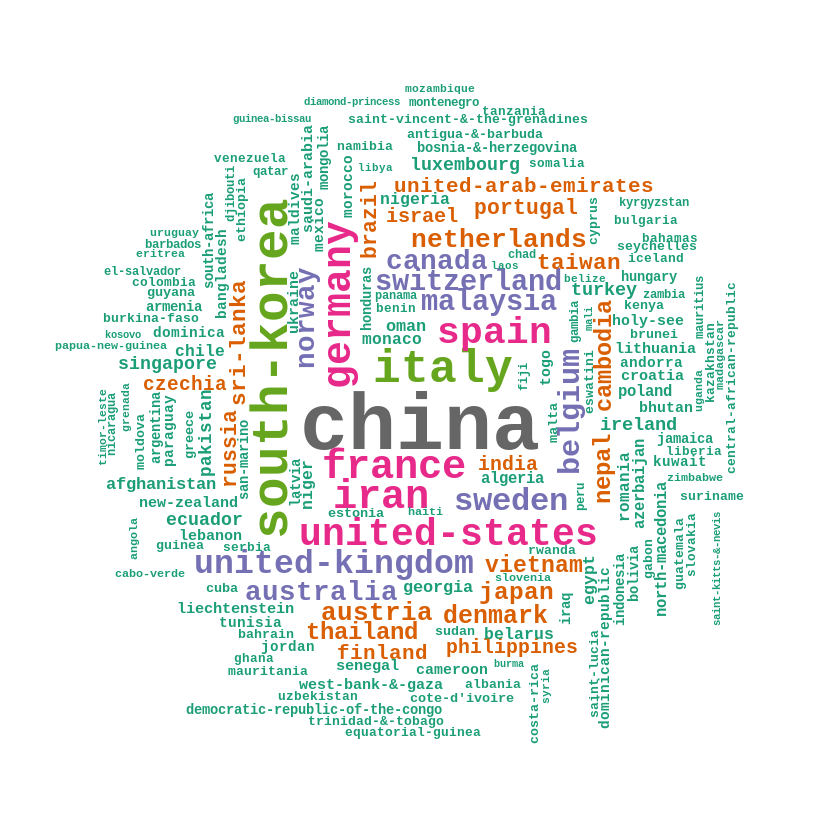

In [20]:
# "Confirm Cases of COVID-19"

# the word cloud ----------> CONFIRMED
wordcloud(words = df_conf$word, freq = df_conf$freq, min.freq = 1,
          max.words=240, random.order=F, rot.per=0.35, 
          colors=brewer.pal(9, "Dark2"),
         family = "mono", font = 2
         )

* #### DEATHS

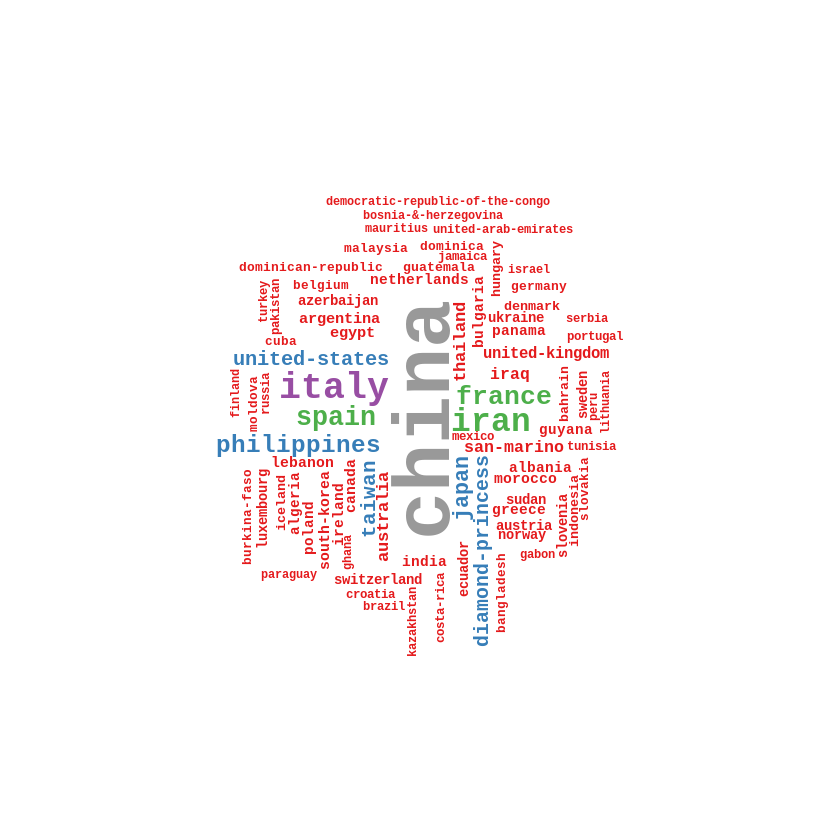

In [23]:
# "Deaths due to COVID-19"

# the word cloud ----------> DEATHS
wordcloud(words = df_dead$word, freq = df_dead$freq, min.freq = 1,
          max.words=80, random.order=F, rot.per=0.35, 
          colors=brewer.pal(9, "Set1"),
         family = "mono", font = 2)

* #### RECOVERED

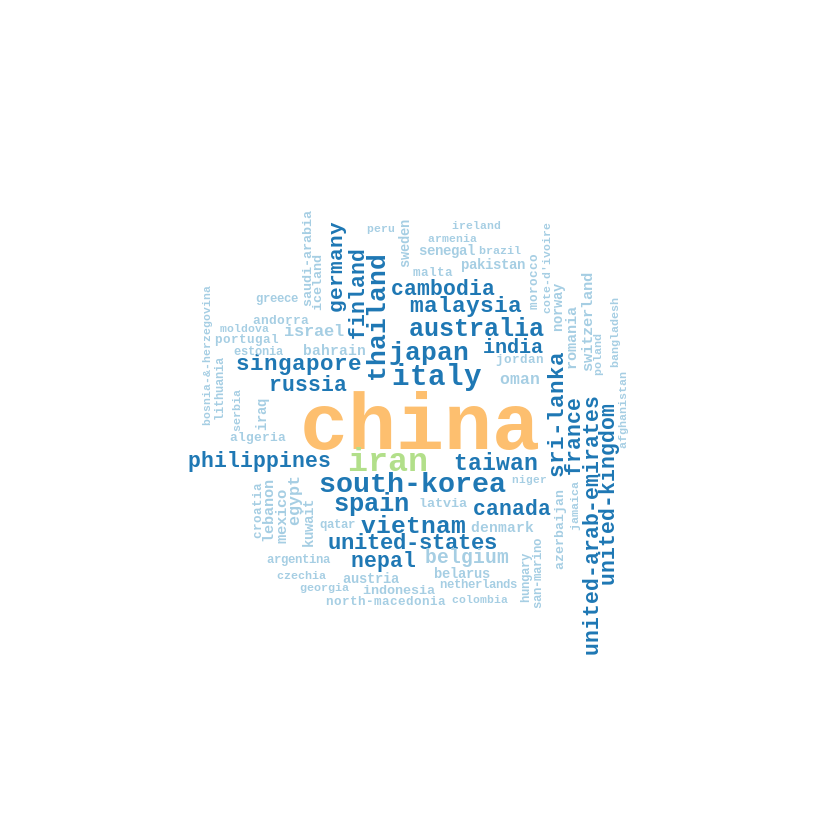

In [26]:
##########################################################################
#################                                     ####################
#################          REMOVED-RECOVERED          ####################
#################                                     ####################
##########################################################################

# "Recovery from COVID-19"

# the word cloud ----------> RECOVERED
wordcloud(words = df_rcvr$word, freq = df_rcvr$freq, min.freq = 1,
          max.words=80, random.order=F, rot.per=0.35, 
          colors=brewer.pal(7, "Paired"),
         family = "mono", font = 2)

<br /><hr /><br />